# Exercise 2.5

In [1]:
import numpy as np
np.random.seed(0)

In [2]:
class One_arm_bandits:
    def __init__(self, n, std):
        self.n = n
        self.std = std
        self.bandits_mean = np.zeros(n)
    
    def sample(self, i):
        return self.bandits_mean[i] + np.random.standard_normal()
    
    def step(self):
        self.bandits_mean += self.std * np.random.standard_normal(self.n)
    
    def best_choice(self):
        return np.argmax(self.bandits_mean)

In [3]:
class const_stepsize:
    def __init__(self, val):
        self.val = val
    
    def __call__(self, n):
        return self.val

def average_stepsize(n):
    return 1/n

class Agent:
    def __init__(self, n, stepsize, epsilon):
        self.n = n
        self.stepsize = stepsize
        self.epsilon = epsilon

        self.mean_estimate = np.zeros(n)
        self.sampled =  np.zeros(n)
    
    def choose_sample(self):
        if np.random.rand() > self.epsilon:
            return np.argmax(self.mean_estimate)
        else:
            return np.random.randint(0, self.n)
        
    def update_estimate(self, i, val):
        self.sampled[i] += 1
        self.mean_estimate[i] = self.mean_estimate[i] + self.stepsize(self.sampled[i]) * (val - self.mean_estimate[i])

In [4]:
bandits = One_arm_bandits(10, 0.1)
const_agent = Agent(10, const_stepsize(0.1), 0.1)
avg_agent = Agent(10, average_stepsize, 0.1)


In [5]:
N = 100000

optimal_choice = np.zeros(N)

conts_agent_choice = np.zeros(N, dtype="int")
const_agent_reward = np.zeros(N)

avg_agent_choice = np.zeros(N, dtype="int")
avg_agent_reward = np.zeros(N)

for i in range(N):
    optimal_choice[i] = bandits.best_choice()

    conts_agent_choice[i] = const_agent.choose_sample()
    avg_agent_choice[i] = avg_agent.choose_sample()

    const_agent_reward[i] = bandits.sample(conts_agent_choice[i])
    avg_agent_reward[i] = bandits.sample(avg_agent_choice[i])
    
    const_agent.update_estimate(conts_agent_choice[i], const_agent_reward[i])
    avg_agent.update_estimate(avg_agent_choice[i], avg_agent_reward[i])
    
    bandits.step()

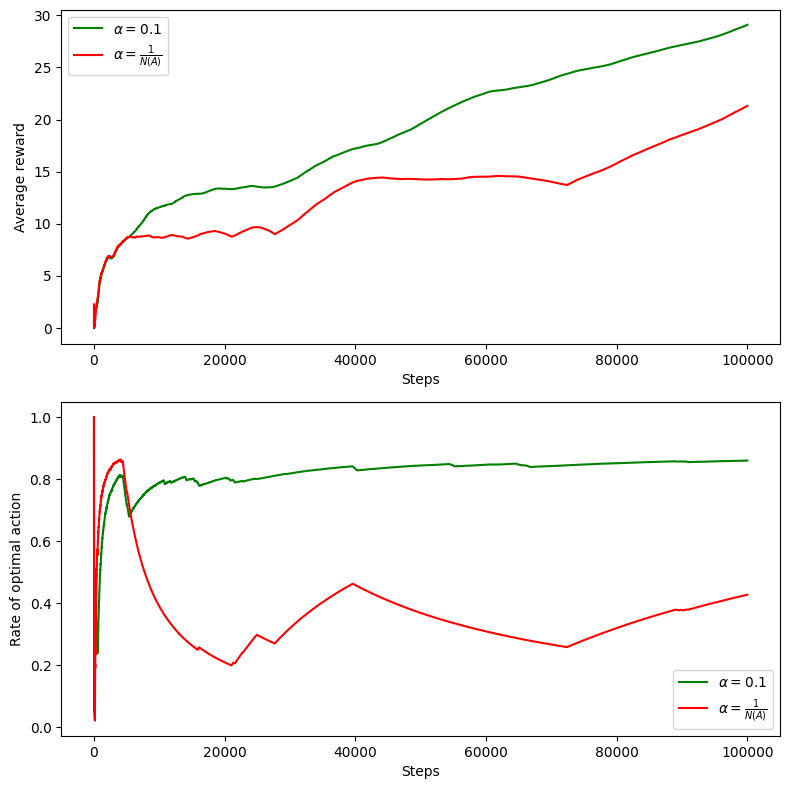

In [6]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

steps = np.arange(1, N + 1)


const_cumulative_average = np.cumsum(const_agent_reward) / np.arange(1, len(const_agent_reward) + 1)
avg_cumulative_average = np.cumsum(avg_agent_reward) / np.arange(1, len(avg_agent_reward) + 1)


# Plotting Average Reward
ax1.plot(steps, const_cumulative_average, 'g-', label=r'$\alpha=0.1$')
ax1.plot(steps, avg_cumulative_average, 'r-', label=r'$\alpha=\frac{1}{N(A)}$')
ax1.set_xlabel('Steps')
ax1.set_ylabel('Average reward')
ax1.legend()

const_correct_choice = np.cumsum(conts_agent_choice == optimal_choice) / np.arange(1, len(conts_agent_choice) + 1)
avg_correct_choice = np.cumsum(avg_agent_choice == optimal_choice) / np.arange(1, len(avg_agent_choice) + 1)

# Plotting % Optimal Action
ax2.plot(steps, const_correct_choice, 'g-', label=r'$\alpha=0.1$')
ax2.plot(steps, avg_correct_choice, 'r-', label=r'$\alpha=\frac{1}{N(A)}$')
ax2.set_xlabel('Steps')
ax2.set_ylabel('Rate of optimal action')
ax2.legend()

plt.tight_layout()
plt.savefig('../chapters_latex/figures/ex_02_05.pdf')
plt.show()

